### **Blinkit Data Analysis using Python Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('blinkit_grocery_data.csv')

In [3]:
df.head(5)

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail(5)

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,sales,rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


# **SIZE OF DATA** 

In [5]:
print("size of dataset is =",df.shape)

size of dataset is = (8523, 12)


# **FIELD INFO**

In [6]:
df.columns

Index(['item_fat_content', 'item_identifier', 'item_type',
       'outlet_establishment_year', 'outlet_identifier',
       'outlet_location_type', 'outlet_size', 'outlet_type', 'item_visibility',
       'item_weight', 'sales', 'rating'],
      dtype='object')

In [7]:
df.dtypes

item_fat_content              object
item_identifier               object
item_type                     object
outlet_establishment_year      int64
outlet_identifier             object
outlet_location_type          object
outlet_size                   object
outlet_type                   object
item_visibility              float64
item_weight                  float64
sales                        float64
rating                       float64
dtype: object

In [8]:
print(df["item_fat_content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df["item_fat_content"]=df["item_fat_content"].replace({"LF":"low_fat",
                                                       "Low Fat":"low_fat",
                                                       "low fat":"low_fat",
                                                       "reg":"regular",
                                                        "Regular":"regular"})

In [10]:
print(df["item_fat_content"].unique())

['regular' 'low_fat']


# **BUSINESS REQUIREMENTS**

In [11]:
#Total Sales
total_sales=df["sales"].sum()
#Average sales
avg_sales=df["sales"].mean()
#No. of items sold
no_of_items_sold=df["sales"].count()
#Average ratings
avg_ratings=df["rating"].mean()

#display
print(f"Total Sales = ${total_sales:,.0f}")
print(f"Avg Sales = ${avg_sales:,.0f}")
print(f"number of items sold = {no_of_items_sold:,.0f}")
print(f"average ratings = {avg_ratings:,.1f}")


Total Sales = $1,201,681
Avg Sales = $141
number of items sold = 8,523
average ratings = 4.0


# **CHARTS REQUIREMENTS**

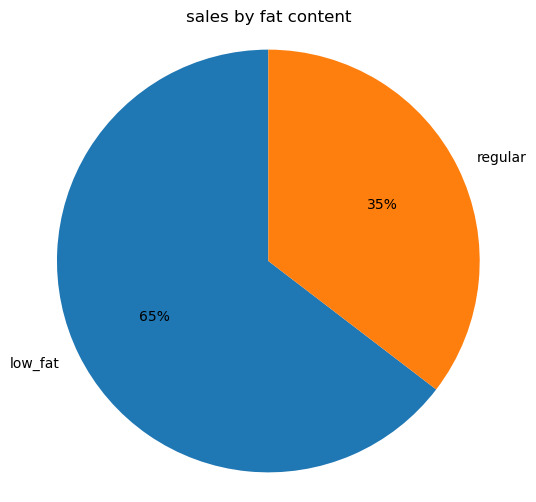

In [12]:
sales_by_fat=df.groupby("item_fat_content")["sales"].sum()
plt.figure(figsize=(6,6))
plt.pie(sales_by_fat, labels=sales_by_fat.index, startangle=90, autopct='%.0f%%')
plt.title("sales by fat content")
plt.axis("equal")
plt.show()

### **TOTAL SALES BY ITEM TYPE**

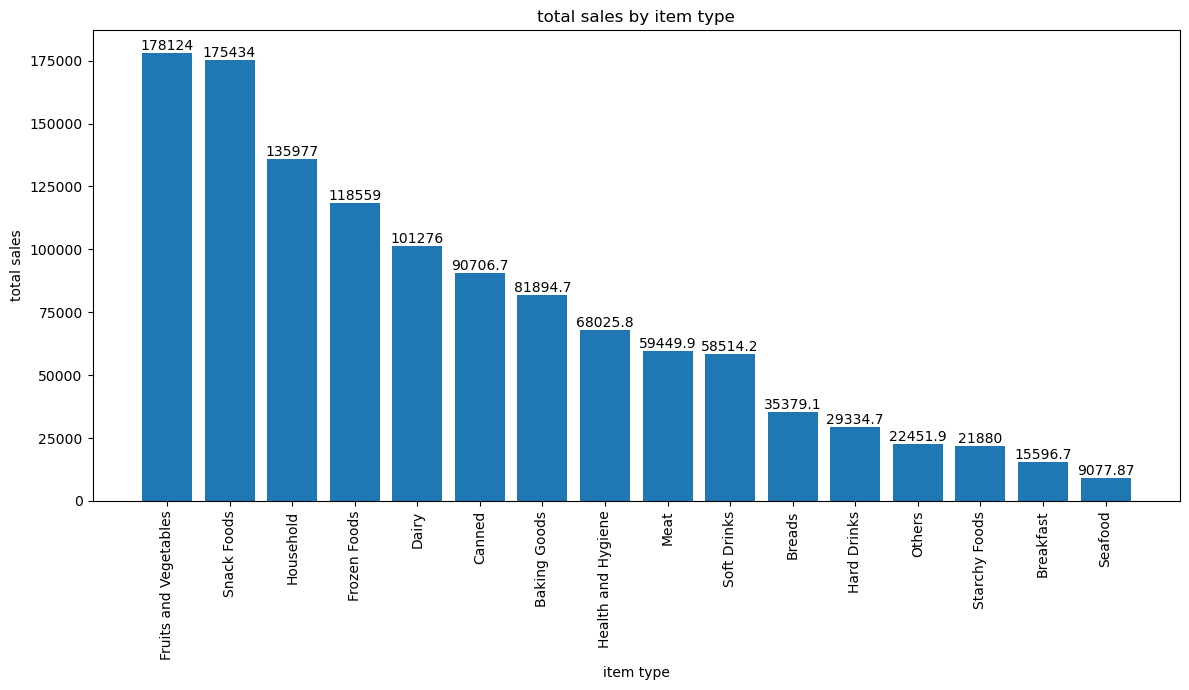

In [13]:
sales_by_type=df.groupby("item_type")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.bar_label(bars)
plt.xticks(rotation=90)
plt.xlabel("item type")
plt.ylabel("total sales")
plt.title("total sales by item type")
plt.tight_layout()

plt.show()

### **FAT CONTENT BY OUTLET FOR TOTAL SALES**

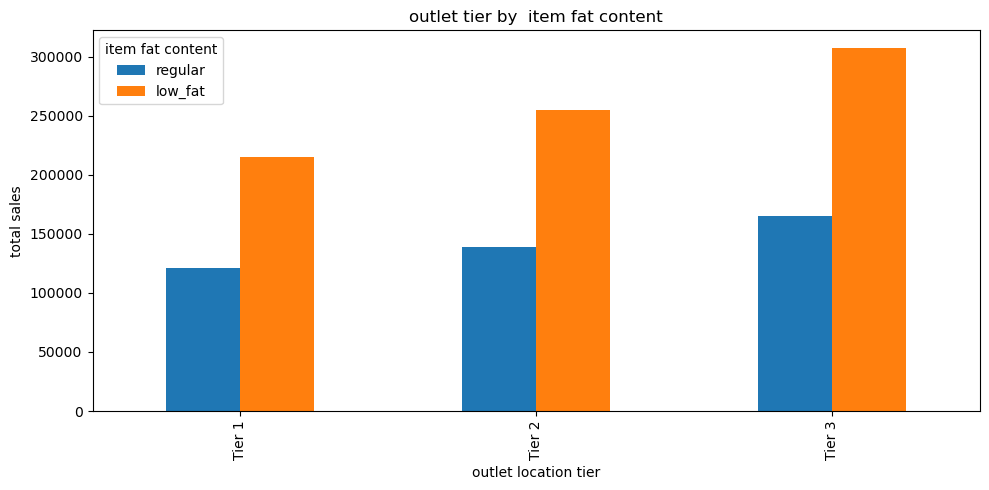

In [14]:
grouped=df.groupby(["outlet_location_type","item_fat_content"])["sales"].sum().unstack()
grouped=grouped[["regular","low_fat"]]

grouped.plot(kind="bar",figsize=(10,5),title="outlet tier by  item fat content")
plt.xlabel("outlet location tier")
plt.ylabel("total sales")
plt.legend(title="item fat content")
plt.tight_layout()
plt.show()

### **TOTAL SALES BY OUTLET ESTABLISHMENT**

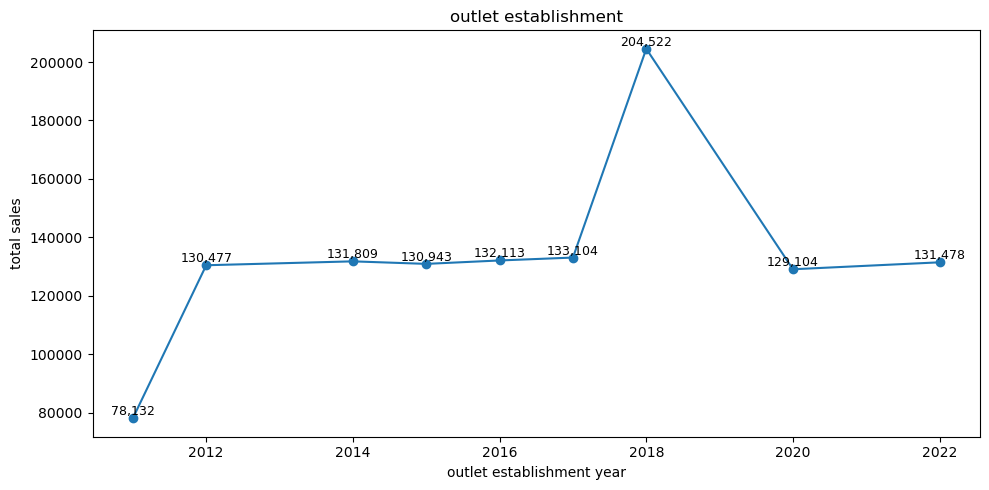

In [15]:
sales_by_year=df.groupby("outlet_establishment_year")["sales"].sum().sort_index()

plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

plt.xlabel("outlet establishment year")
plt.ylabel("total sales")
plt.title("outlet establishment")
plt.tight_layout()

plt.show()

### **SALES BY OUTLET SIZE**

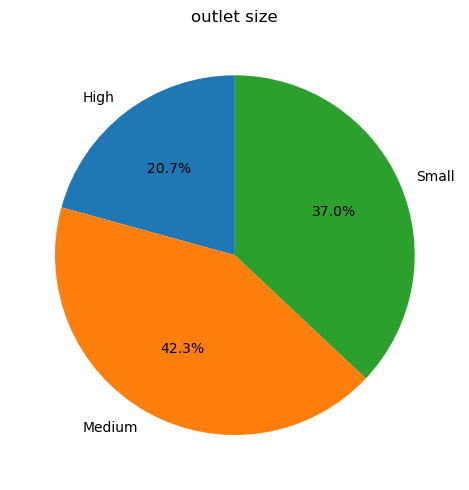

In [16]:
sales_by_size=df.groupby("outlet_size")["sales"].sum()

plt.figure(figsize=(5,5))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct="%1.1f%%",startangle=90)
plt.title("outlet size")
plt.tight_layout()
plt.show()

### **SALES BY OUTLET LOCATION**

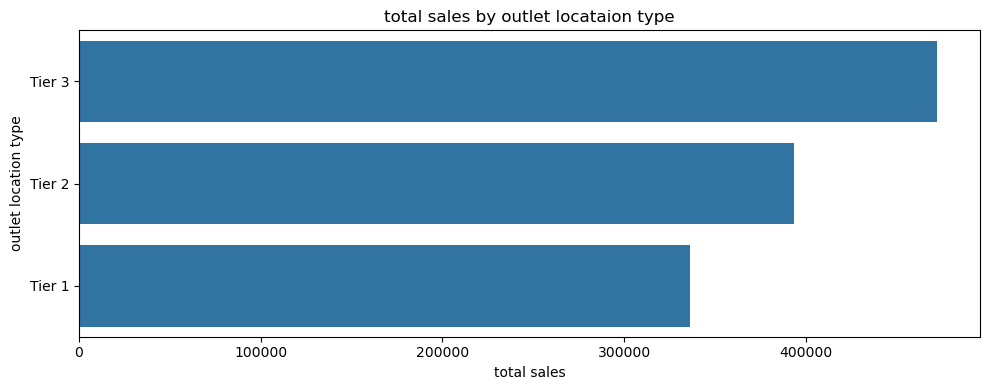

In [17]:
sales_by_location=df.groupby("outlet_location_type")["sales"].sum().reset_index()
sales_by_location=sales_by_location.sort_values("sales",ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x="sales",y="outlet_location_type",data=sales_by_location)

plt.title("total sales by outlet locataion type")
plt.xlabel("total sales")
plt.ylabel("outlet location type")
plt.tight_layout()

plt.show()